<a href="https://colab.research.google.com/github/angelosalton/data-notebooks/blob/master/inclusao-financeira-africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/angelosalton/data-notebooks/blob/master/inclusao-financeira-africa.ipynb)

# Problema

A presente análise trata do desafio da inclusão financeira na África. É sabido que sistemas financeiros bem desenvolvidos trazem uma série de benefícios para o desenvolvimento econômico de uma região e, consequentemente, para o bem-estar daqueles que a habitam, através do acesso ao crédito e produtos de investimento, que possibilitam a geração de riqueza e suavização do consumo das famílias.

Ainda, sabe-se que o continente africano ainda possui grandes desafios de desenvolvimento econômico, resultado de décadas de inseguranças políticas e de instituições. [Demirgüç-Kunt e Klapper (2012)](https://openknowledge.worldbank.org/bitstream/handle/10986/9335/WPS6088.pdf?sequence=1) apontam que apenas 23% dos africanos em idade adulta possuem conta bancária, e dentro das regiões africanas os valores variam amplamente (51% no Sul africano, 11% na região Central e 20% no Norte.). As principais barreiras percebidas são a falta de recursos suficientes para movimentar as contas e a falta de documentos necessários para abrir uma conta.

Como alternativa ao sistema bancário tradicional, outros canais de transações financeiras emergiram no continente, como os sistemas *mobile*, principalmente no Quênia. Em relatório do Banco Mundial, [Triki e Faye (2013)](https://www.mfw4a.org/sites/default/files/resources/Financial_Inclusion_in_Africa.pdf) observam que a população muitas vezes toma empréstimos diretos com outras pessoas físicas, em associações que se assemelham a cooperativas de crédito, ou mesmo acumulam ativos nas suas residências, na forma de rebanhos ou dinheiro guardado. Ainda, políticas e iniciativas de microcrédito com base na experiência indiana do [Grameen Bank](http://www.grameen.com/) lentamente avançam no continente.

# Objetivos

O objetivo principal da análise é predizer a probabilidade de um indivíduo possuir conta bancária, dentre uma série de determinantes. Os dados são das pesquisas da [FSD Africa](https://www.fsdafrica.org/), entidade que busca estender o acesso a serviços financeiros no continente africano. Os indivíduos pesquisados se encontram no Quênia, Ruanda, Tanzânia e Uganda.

# Análise exploratória

## Importação dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setup
sns.set_theme(palette='pastel')

seed = 1

train = pd.read_csv('https://raw.githubusercontent.com/angelosalton/data-notebooks/master/datasets/Train_v2.csv')
variables = pd.read_csv('https://raw.githubusercontent.com/angelosalton/data-notebooks/master/datasets/VariableDefinitions.csv')

In [2]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Nos dados da pesquisa, cada observação é um indivíduo, que não é acompanhado ao longo do tempo.

Aqui, descrevemos as *features*:
* **country**: País do entrevistado
* **year**: Ano da pesquisa
* **uniqueid**: Identificador do entrevistado
* **location_type**: Localidade rural ou urbana
* **cellphone_access**: Entrevistado têm acesso ao celular?
* **household_size**: Pessoas no domicílio
* **age_of_respondent**: Idade do entrevistado
* **gender_of_respondent**: Gênero do entrevistado
* **relationship_with_head**: Relacionamento do entrevistado com o(a) chefe do domicílio
* **marital_status**: Estado civil do entrevistado
* **education_level**: Nível educacional do entrevistado
* **job_type**: Atividade do entrevistado

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Vemos que há *features* de tipos numéricos, categóricos, de texto e binários. Mais adiante, definiremos estratégias para tratar estes dados.

## Estatísticas descritivas

Primeiramente, as estatísticas descritivas. Pela tabela, aprendemos sobre os nossos dados, como a média de idade dos entrevistados, e que a maior parte dos entrevistados são mulheres, casadas, chefes de família e que não possuem conta bancária.

In [4]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524,NaN,NaN,NaN,2016.98,0.847371,2016,2016,2017,2018,2018
uniqueid,23524,8735,uniqueid_1898,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524,NaN,NaN,NaN,3.79748,2.22761,1,2,3,5,21
age_of_respondent,23524,NaN,NaN,NaN,38.8052,16.5206,16,26,35,49,100
gender_of_respondent,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verificamos a presença de dados faltantes:

In [5]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

A seguir, vamos analisar a distribuição dos entrevistados de acordo com algumas *features*.

In [6]:
print('Entrevistados, por país e ano')
pd.crosstab(train['country'], train['year'])

Entrevistados, por país e ano


year,2016,2017,2018
country,,,
Kenya,0,0,6068
Rwanda,8735,0,0
Tanzania,0,6620,0
Uganda,0,0,2101


In [7]:
print('Entrevistados, por país e localidade')
pd.crosstab(train['country'], train['location_type'])

Entrevistados, por país e localidade


location_type,Rural,Urban
country,,
Kenya,3543,2525
Rwanda,7483,1252
Tanzania,1809,4811
Uganda,1508,593


In [8]:
print('Estatísticas descritivas')
for col in train.columns:
    print(f'Frequências: {col}')
    print(round(train[col].value_counts()/train[col].count()*100, 2))
    print('\n')

Estatísticas descritivas
Frequências: country
Rwanda      37.13
Tanzania    28.14
Kenya       25.79
Uganda       8.93
Name: country, dtype: float64


Frequências: year
2016    37.13
2018    34.73
2017    28.14
Name: year, dtype: float64


Frequências: uniqueid
uniqueid_1898    0.02
uniqueid_1545    0.02
uniqueid_195     0.02
uniqueid_444     0.02
uniqueid_171     0.02
                 ... 
uniqueid_7278    0.00
uniqueid_7411    0.00
uniqueid_7188    0.00
uniqueid_7770    0.00
uniqueid_8589    0.00
Name: uniqueid, Length: 8735, dtype: float64


Frequências: bank_account
No     85.92
Yes    14.08
Name: bank_account, dtype: float64


Frequências: location_type
Rural    60.97
Urban    39.03
Name: location_type, dtype: float64


Frequências: cellphone_access
Yes    74.2
No     25.8
Name: cellphone_access, dtype: float64


Frequências: household_size
2     22.23
3     16.66
4     14.77
1     13.00
5     12.13
6      8.91
7      5.95
8      3.19
9      1.54
10     0.81
11     0.29
12     0.29

## Relação entre *features* e *target*

A seguir, vamos analisar a relação das *features* com nosso *target*, `bank_account`.

In [9]:
print('Conta bancária por gênero')
pd.crosstab(train['bank_account'], train['gender_of_respondent'])

Conta bancária por gênero


gender_of_respondent,Female,Male
bank_account,,
No,12395,7817
Yes,1482,1830


Text(0.5, 1.0, 'Idade e conta bancária')

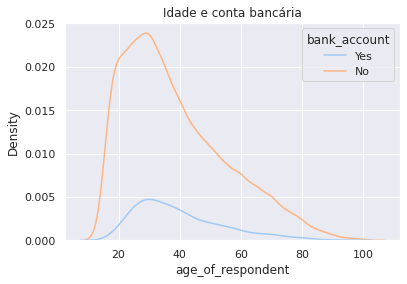

In [10]:
sns.kdeplot(data=train, x='age_of_respondent', hue='bank_account')
plt.title('Idade e conta bancária')

Text(0.5, 0, 'Pessoas')

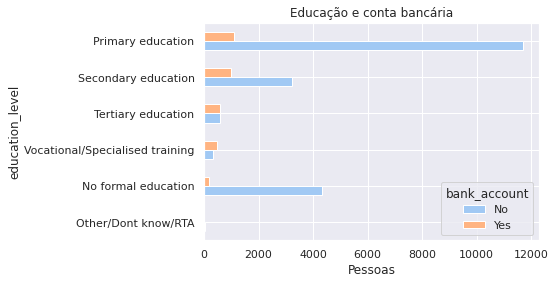

In [11]:
train.groupby(['education_level','bank_account']).count()['uniqueid'].unstack().sort_values(by='Yes').plot(kind='barh')
plt.title('Educação e conta bancária')
plt.xlabel('Pessoas')

Text(0.5, 0, 'Pessoas')

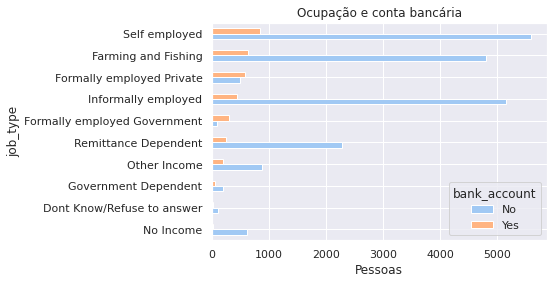

In [12]:
train.groupby(['job_type','bank_account']).count()['uniqueid'].unstack().sort_values(by='Yes').plot(kind='barh')
plt.title('Ocupação e conta bancária')
plt.xlabel('Pessoas')

## Correlações entre *features*

Agora, vamos correlacionar nossas *features* em busca de relações estatísticas lineares e não-lineares. Assim, podemos encontrar combinações com maior poder de predição de `bank_account`. Para tanto, vamos transformar nossas *features* categóricas e binárias. Farei isto através da função `get_dummies` do `pandas`, mas é possível também usar os *pipelines* do `scikit-learn`.

In [13]:
train.drop(columns='uniqueid', inplace=True)
train_t = pd.get_dummies(train, drop_first=True) # drop_first: multicolinearidade perfeita

In [14]:
train_t.head()

,year,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,5,34,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8,26,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Matriz de correlações de Pearson')

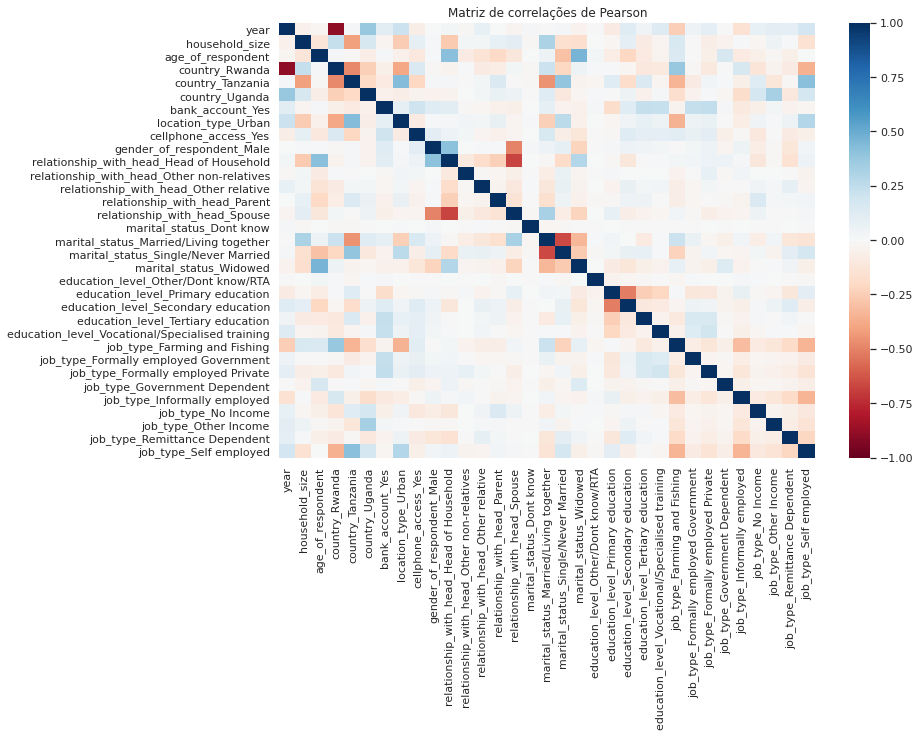

In [15]:
tc = train_t.corr()

plt.figure(figsize=(12,8))
sns.heatmap(tc, vmin=-1, vmax=1, cmap='RdBu')
plt.title('Matriz de correlações de Pearson')

Vamos também investigar a matriz de correlações através do método Tau de Kendall. Por ser não-paramétrico, pode ser útil na identificação de relações não-lineares.

Text(0.5, 1.0, 'Matriz de correlações - Kendall')

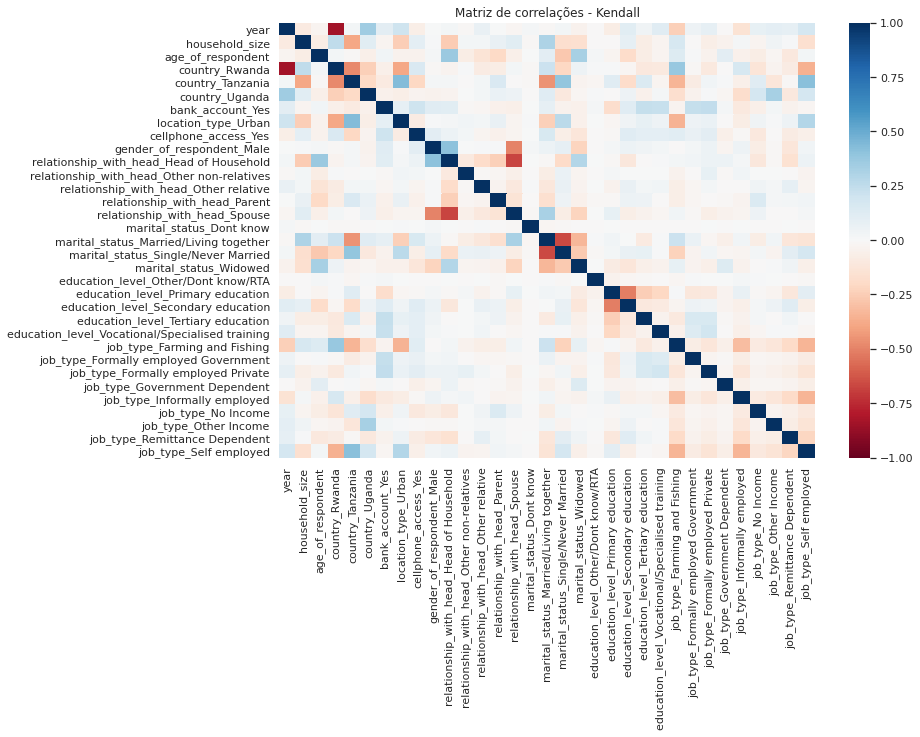

In [16]:
tc = train_t.corr(method='kendall')

plt.figure(figsize=(12,8))
sns.heatmap(tc, vmin=-1, vmax=1, cmap='RdBu')
plt.title('Matriz de correlações - Kendall')

Finalmente, isolando apenas as correlações lineares com `bank_account`:

In [17]:
print('Matriz de correlações com bank_account')
tc = train_t.corr()['bank_account_Yes'].sort_index()
tc

Matriz de correlações com bank_account


age_of_respondent                                  0.019429
bank_account_Yes                                   1.000000
cellphone_access_Yes                               0.209669
country_Rwanda                                    -0.057378
country_Tanzania                                  -0.088345
country_Uganda                                    -0.049200
education_level_Other/Dont know/RTA                0.019255
education_level_Primary education                 -0.173702
education_level_Secondary education                0.123702
education_level_Tertiary education                 0.241958
education_level_Vocational/Specialised training    0.232187
gender_of_respondent_Male                          0.117234
household_size                                    -0.028326
job_type_Farming and Fishing                      -0.037986
job_type_Formally employed Government              0.235900
job_type_Formally employed Private                 0.249478
job_type_Government Dependent           

## Discussão

Das análises acima podemos extrair dos dados uma série de conclusões:
* O acesso ao sistema financeiro é desigual entre os países pesquisados, mas vêm crescendo ao longo do tempo;
* Renda, contexto familiar e gênero são determinantes do acesso ao sistema;
* O acesso ao telefone celular pode ser um importante determinante de adesão ao sistema financeiro, pois abre o acesso aos sistemas *mobile*. Entretanto, está relacionado ao nível de renda.

Ainda, descobrimos a *persona* do portador de conta bancária naquela região: homens, de maior idade, nível educacional e de renda. Estas descobertas são compatíveis com a literatura econômica e deverão embasar a modelagem de previsão. Ainda, nota-se que devemos excluir algumas *features* da análise, como `year`, por ela estar altamente correlacionada com a localidade da pesquisa, afinal, nos anos de 2016 e 2017 ela só foi conduzida em um determinado país.

# Modelagem

## Experimento #1

Ao longo da estratégia de modelagem, devemos nos perguntar quais as *features* mais importantes para as previsões. Podemos começar essa investigação através de um modelo de regressão logística simples. A escolha deste tipo de modelo se dá pois nosso *target*, `bank_account`, é uma escolha binária (tem conta ou não).

In [18]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
logit = sm.Logit(endog = train_t['bank_account_Yes'], exog=add_constant(train_t.drop(columns=['year','bank_account_Yes'])))
logit_fit = logit.fit()
logit_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       bank_account_Yes   No. Observations:                23524
Model:                          Logit   Df Residuals:                    23492
Method:                           MLE   Df Model:                           31
Date:                Thu, 14 Jan 2021   Pseudo R-squ.:                     inf
Time:                        00:51:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -5.6263      0.366    -15.370      0.000      -6.344      -4.909
household_size                                      0.0006      0.012      0.051      0.960      -0.023       0.024
age_of_respondent                                   0.0154      0.002      8.304      0.000       0.012       0.019
country_Rwanda                                     -0.3457      0.056     -6.126      0.000      -0.456      -0.235
country_Tanzania                                   -1.1861      0.082    -14.532      0.000      -1.346      -1.026
country_Uganda                                     -1.4108      0.104    -13.583      0.000      -1.614      -1.207
location_type_Urban                                 0.2852      0.051      5.614      0.000       0.186       0.385
cellphone_access_Yes                                1.8026      0.107     16.920      0.000       1.594       2.011
gender_of_respondent_Male                           0.4123      0.061      6.782      0.000       0.293       0.531
relationship_with_head_Head of Household            0.7874      0.109      7.197      0.000       0.573       1.002
relationship_with_head_Other non-relatives         -0.0030      0.284     -0.011      0.992      -0.559       0.553
relationship_with_head_Other relative               0.1041      0.172      0.604      0.546      -0.234       0.442
relationship_with_head_Parent                      -0.0042      0.170     -0.025      0.980      -0.338       0.330
relationship_with_head_Spouse                       0.6483      0.123      5.291      0.000       0.408       0.888
marital_status_Dont know                            0.2537      0.971      0.261      0.794      -1.649       2.157
marital_status_Married/Living together              0.1619      0.102      1.589      0.112      -0.038       0.362
marital_status_Single/Never Married                -0.0115      0.094     -0.123      0.902      -0.196       0.173
marital_status_Widowed                              0.0588      0.123      0.477      0.633      -0.183       0.300
education_level_Other/Dont know/RTA                 2.2907      0.436      5.258      0.000       1.437       3.145
education_level_Primary education                   0.7972      0.089      8.924      0.000       0.622       0.972
education_level_Secondary education                 1.7655      0.097     18.282      0.000       1.576       1.955
education_level_Tertiary education                  3.1543      0.118     26.832      0.000       2.924       3.385
education_level_Vocational/Specialised training     2.8261      0.121     23.401      0.000       2.589       3.063
job_type_Farming and Fishing                       -0.4932      0.310     -1.593      0.111      -1.100       0.114
job_type_Formally employed Government               1.3530      0.335      4.034      0.000       0.696      

### Discussão

A interpretação dos coeficientes de regressão logística pode se dar pelo cálculo de razão de chances. Isto se dá através da transformação exponencial do modelo:

$$\ln \frac{p}{1-p}=\beta X + \varepsilon \rightarrow \frac{p}{1-p} = e^{\beta X + \varepsilon}$$

Onde $p$ é a probabilidade $\Pr(Y=1)$, ou seja, o indivíduo tem conta bancária. De forma simplificada, a razão de chances é $\frac{\Pr(Y=1)}{1-\Pr(Y=1)}$, e para cada um dos parâmetros do vetor $\beta$ a razão $e^{\beta}$ será a mudança em $p$ se aumentamos cada *feature* em 1 unidade. A exemplo dos resultados do modelo acima, o fato do entrevistado possuir telefone celular faz com que seja 6 vezes mais provável que ele possua conta bancária, pois $e^{1,8026}=6,06$. Além disso, através dos erros-padrão e do escore z podemos identificar as features com maior poder de inferência, e consequentemente de generalização para futuros casos.

## Experimento #2

Neste experimento, vamos comparar o poder preditivo de uma série de modelos de classificação binária presentes na biblioteca [scikit-learn](https://scikit-learn.org/), com suas configurações padrão, usando validação cruzada simples (*one-fold*).

In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

Definimos os modelos a serem testados:

In [21]:
# modelos com componente estocástico
kwargs = {
    'random_state': seed
}

models = {
          'naivebayes': GaussianNB(),
          'logit': LogisticRegression(solver='newton-cg',**kwargs),
          'kneighbors': KNeighborsClassifier(),
          #'svc': LinearSVC(), # raises ValueError
          'decision': DecisionTreeClassifier(**kwargs),
          'randomforest': RandomForestClassifier(**kwargs),
          'gradient': GradientBoostingClassifier(**kwargs),
          'adaboost': AdaBoostClassifier(**kwargs),
}

Dividimos os dados em amostras de treinamento e teste:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_t.drop(columns=['year', 'bank_account_Yes']), train_t['bank_account_Yes'], test_size=0.3, **kwargs)

Definimos uma etapa simples de *feature engineering* para garantir a consistência dos dados e o *pipeline*.

In [23]:
from sklearn.impute import SimpleImputer

feat_eng = SimpleImputer()

Com o auxílio da biblioteca [Yellowbrick](https://www.scikit-yb.org/), iremos visualizar os resultados dos modelos de classificação, através de três principais métricas:
- Precision: $\frac{VP}{VP+FP}$
- Recall: $\frac{VP}{VP+FN}$
- F1-score: $2*\frac{\textrm{Precision} * \textrm{Recall}}{\textrm{Precision} * \textrm{Recall}}$

onde $VP$ são os verdadeiros positivos, $FP$ são os falsos positivos e $FN$ são os falsos negativos.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Running naivebayes


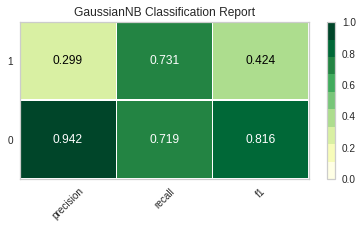

Running logit


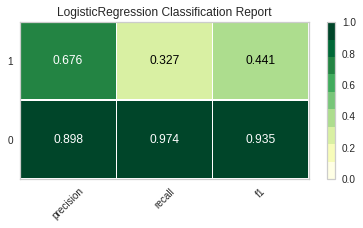

Running kneighbors


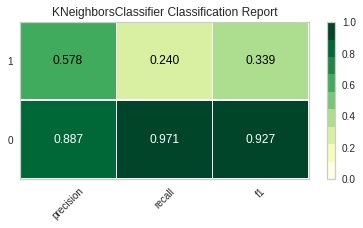

Running decision


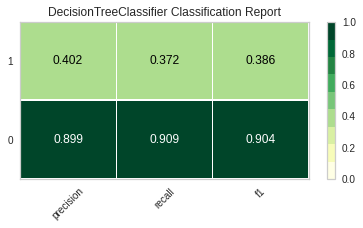

Running randomforest


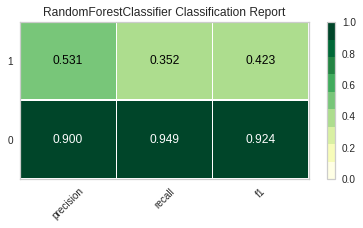

Running gradient


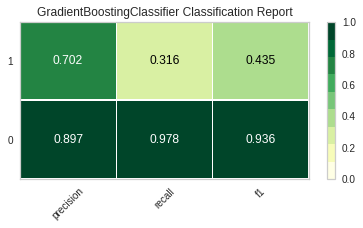

Running adaboost


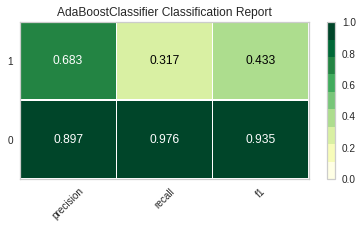

In [24]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
from yellowbrick.classifier import confusion_matrix

for mod in models.keys():
    print(f'Running {mod}')
    pipe = Pipeline([
        ('feat_eng', feat_eng),
        ('estimator', models[mod])
    ])
    
    report = ClassificationReport(pipe, size=(400, 240), cmap="YlGn")
    report.fit(X_train, y_train)
    report.score(X_test, y_test)
    report.poof()

A seguir, vamos visualizar os gráficos de ROC (*receiving operator characteristics*), que mostram como os modelos de classificação se comportam dados vários *thresholds*, ou seja, valores limiares da regra de decisão entre as classes previstas (tem conta bancária ou não).

Running naivebayes


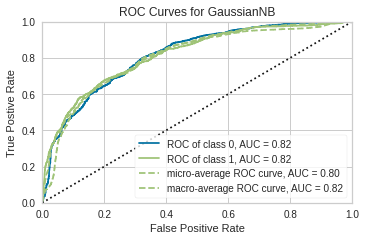

Running logit


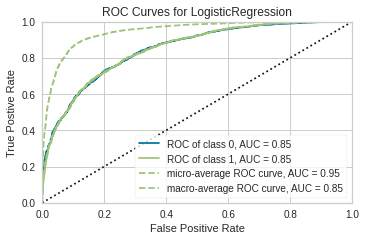

Running kneighbors


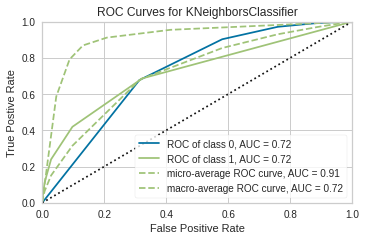

Running decision


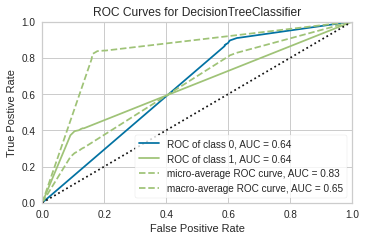

Running randomforest


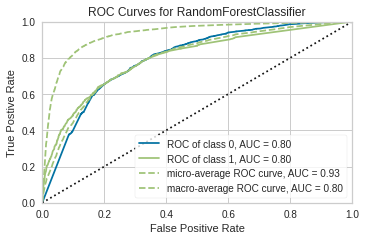

Running gradient


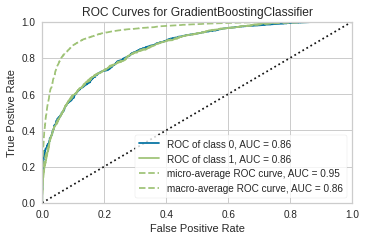

Running adaboost


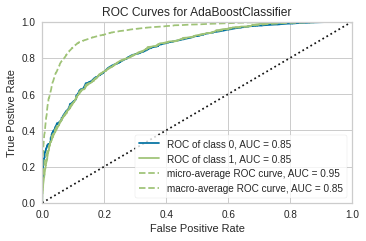

In [25]:
for mod in models.keys():
    print(f'Running {mod}')
    pipe = Pipeline([
        ('feat_eng', feat_eng),
        ('estimator', models[mod])
    ])
    
    report = ROCAUC(pipe, size=(400, 240), cmap="YlGn")
    report.fit(X_train, y_train)
    report.score(X_test, y_test)
    report.poof()

### Discussão

De acordo com a análise acima, os modelos com as previsões mais consistentes e com melhor ajustamento aos dados foram, respectivamente, Gradient Boosting, AdaBoost e Regressão Logística. Ambos entregaram resultados similares, entretanto o modelo de Regressão Logística possui um custo computacional menor, sendo uma boa opção do ponto de vista de implementação.

Ademais, se nosso modelo possuir ênfase em predizer se o indívíduo **têm** conta bancária, ou seja, se queremos maximizar os verdadeiros positivos e minimizar os falsos, vemos que o modelo Gradient Boosting possuiu performance ligeiramente superior na validação cruzada simples realizada até aqui. Vimos também que os Erros do Tipo I e II são mais frequentes nas previsões de que o indivíduo têm conta bancária. Isto é esperado pois essa classe é menos frequente nos dados: apenas 14% dos entrevistados nas pesquisas são clientes de instituições financeiras. O problema de classes desbalanceadas é um dos mais desafiadores em *machine learning*, e várias técnicas podem ser implementadas, como *oversampling*, *undersampling* e SMOTE.

Finalmente, cabe ressaltar que foram usados os valores padrão para os parâmetros de cada modelo. Por simplicidade e tempo faremos apenas o *tuning* do modelo selecionado.

### Feature engineering

Nesta parte buscaremos enriquecer os modelos e sua capacidade de previsão buscando interações entre as *features*. Uma maneira de criar essas interações é através da classe `PolynomialFeatures`, onde podemos criar interações de determinada ordem entre as *features*. Como a maior parte das mesmas são binárias, interações de primeira ordem são mais interessantes. Aliado à isto, como o espaço de *features* é relativemente pequeno e a variância total dos dados é reduzida, técnicas de redução de dimensionalidade aqui serão menos relevantes.

Uma exceção para o caso das interações é `age_of_respondent` (a idade do respondente), onde uma interação de segunda ordem consigo mesma é relevante: a intuição de `age_of_respondent^2` é de que embora a idade aumente a probabilidade do indivíduo ter conta bancária, como vimos no Experimento #1, é possível que esse efeito seja menor conforme ele envelhece.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

Running naivebayes


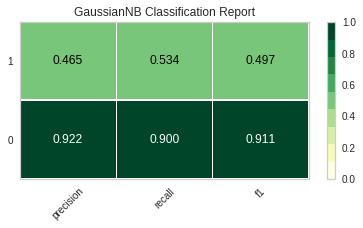

Running logit


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


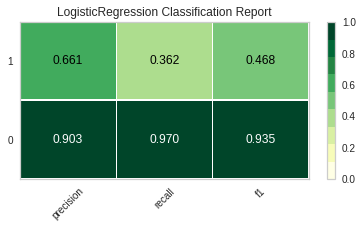

Running kneighbors


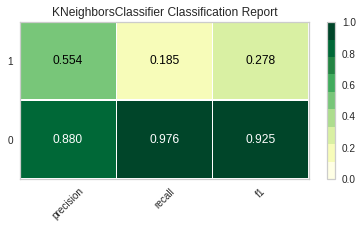

Running decision


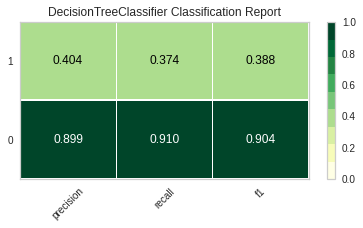

Running randomforest


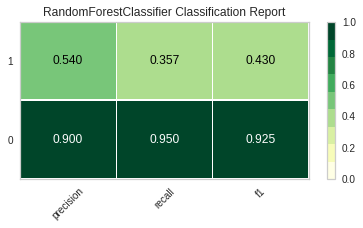

Running gradient


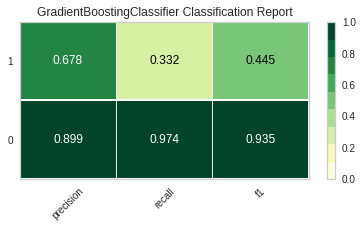

Running adaboost


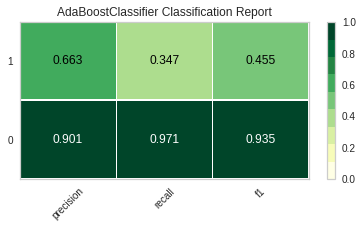

In [27]:
for mod in models.keys():
    print(f'Running {mod}')
    pipe = Pipeline([
        ('feat_eng', feat_eng),
        ('polynomial', poly),
        ('estimator', models[mod])
    ])
    
    report = ClassificationReport(pipe, size=(400, 240), cmap="YlGn")
    report.fit(X_train, y_train)
    report.score(X_test, y_test)
    report.poof()

Vemos que a criação de interações de segunda ordem não trouxe benefícios para o poder de previsão dos modelos testados.

## Experimento #3

Até agora, testamos as capacidades individuais de previsão dos modelos. Neste experimentos, vamos ver se a combinação destes modelos através de *stacking* nos traz resultados mais robustos. Usaremos o `VotingClassifier`, onde a previsão final é o resultado de um consenso entre as previsões de cada modelo.

In [28]:
from sklearn.ensemble import VotingClassifier

In [29]:
estimators = [(k, v) for k, v in models.items()]

clf = VotingClassifier(estimators)

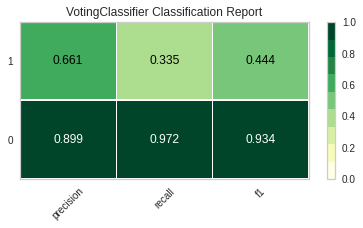

In [30]:
viz = ClassificationReport(clf, size=(400, 240), cmap="YlGn")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

A matriz de confusão:

In [31]:
from yellowbrick.classifier import confusion_matrix

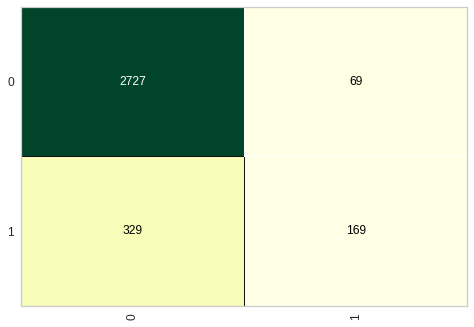

In [32]:
confusion_matrix(clf, X_train, y_train, cmap="YlGn")

Vimos que a combinação entre os modelos através do `VotingClassifier` trouxe menos confiança para prever se o indivíduo *tem* conta bancária, em troca de maior confiança em prever se o indivíduo *não a tem*.

## Experimento #4

Neste último experimento, elegemos o `GradientBoostingClassifier` como nosso modelo de previsão. Faremos o ajuste dos parâmetros e avaliaremos a capacidade de aprendizagem do modelo. O objetivo principal é encontrar um balanço entre viés e variância.

### *Model Tuning*

Primeiramente, veremos nas curvas de validação a resposta aos parâmetros do modelo de Gradient Boosting: `learning_rate`, que é um parâmetro de regularização, e `subsample`, que aleatoriza sub-amostras das árvores 

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [34]:
mod4 = GradientBoostingClassifier(**kwargs)
cv = StratifiedKFold(3)

In [35]:
param_grid = {
    'learning_rate': np.linspace(0.1, 1, 10),
    'subsample': np.linspace(0.8, 1, 3)
}

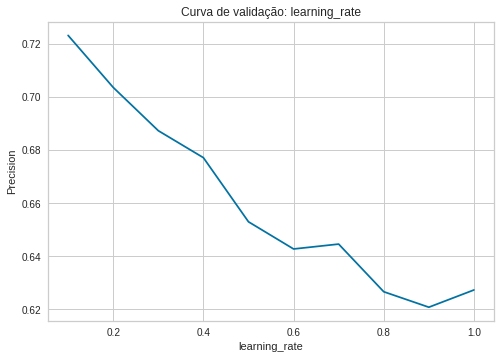

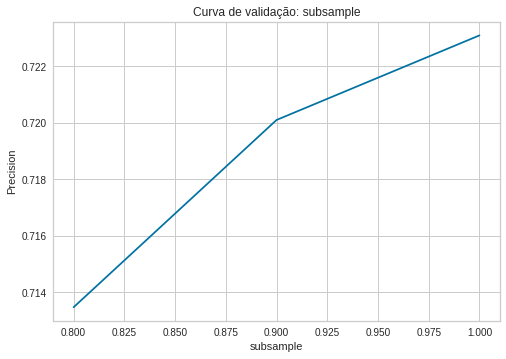

In [36]:
for param, values in param_grid.items():
    grid = GridSearchCV(
        mod4,
        param_grid={param: values},
        cv=3,
        scoring='precision'
    )

    # fit
    grid.fit(X_train, y_train)

    # curva de validação manual (bug Yellowbrick)
    plt.figure()
    plt.plot(values, grid.cv_results_['mean_test_score'])
    plt.title(f'Curva de validação: {param}')
    plt.xlabel(param)
    plt.ylabel('Precision')

Vemos que embora seja possível explorar valores de `learning_rate` aquém de 0,1, podemos levar o modelo ao *overfitting*.

### Curvas de aprendizagem

Reiniciamos a busca por parâmetros considerando a melhor combinação dentre as faixas delimitadas e visualizamos a curva de aprendizagem:

In [37]:
param_grid = {
    'learning_rate': np.linspace(0.1, 1, 10),
    'subsample': np.linspace(0.8, 1, 3)
}

grid = GridSearchCV(
        mod4,
        param_grid=param_grid,
        cv=3,
        scoring='precision'
    )

grid.fit(X_train, y_train)

# pega o melhor modelo de acordo com score
mod_best = grid.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


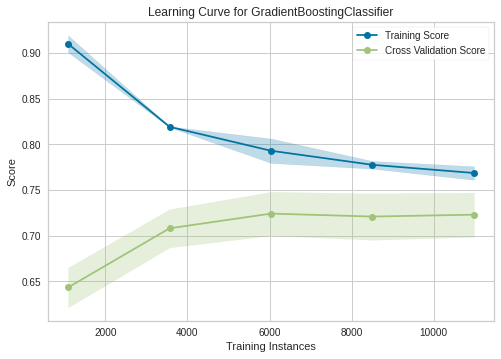

In [38]:
from yellowbrick.model_selection import LearningCurve

viz = LearningCurve(
    mod_best,
    cv=cv,
    scoring='precision'
)
viz.fit(X_train, y_train)
viz.poof()

De acordo com a curva de aprendizagem, os *scores* das amostras de treinamento e validação cruzada iniciam uma convergência a partir de 6,000 amostras de treinamento, indicando que a inclusão de mais amostras beneficiaria a precisão do modelo em geral. A baixa variabilidade e os *scores* altos nas primeiras amostras de treinamento podem ser um indício de excesso de ajustamento do modelo aos dados de treinamento.

Por fim, são apresentadas as métricas finais do modelo de previsão.

In [39]:
print('Métricas finais do modelo')
print(metrics.classification_report(y_test, mod_best.predict(X_test)))

Métricas finais do modelo
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6066
           1       0.70      0.32      0.44       992

    accuracy                           0.88      7058
   macro avg       0.80      0.65      0.69      7058
weighted avg       0.87      0.88      0.87      7058



# Considerações finais

Ao longo deste *notebook* fizemos uma breve análise dos dados de inclusão financeira em países do continente africano, conforme pesquisa da [FSD Africa](https://www.fsdafrica.org/). Aprendemos mais sobre o perfil dos clientes e não-clientes de instituições naquela região. Com base em conceitos de *machine learning*, construímos um modelo que nos dá a probabilidade de um indivíduo possuir uma conta bancária, de acordo com suas características sócioeconômicas, acertando em cerca de 70% dos casos se o indivíduo possui de fato uma conta, e em 88% os casos em geral.

Melhorias na análise podem ser conduzidas, primeiramente investindo mais tempo na capacidade de generalização do modelo e em um segundo momento explorando *frameworks* do estado-da-arte em *machine learning* como [XGBoost](https://xgboost.readthedocs.io/en/latest/), [CatBoost](https://catboost.ai/) e abordagens baseadas em redes neurais (ex.: [PyTorch](https://pytorch.org/)).